**<center>AMEP Examples</center>**

<center>&copy; 2024 Lukas Hecht and the AMEP development team</center>

<img src="../amep-logo_v2.png" alt="AMEP Logo" width="300" style="display:block; margin:auto;"/>

**Welcome to the AMEP examples notebook!**

In this Jupyter notebook, you will find the first steps of using AMEP so you can have a starting point for your own work.
The data used is available at https://github.com/amepproject/amep/tree/main/examples/data: [**Download zip**](https://download-directory.github.io/?url=https://github.com/amepproject/amep/tree/main/examples/data)

In the first example, we analyze simulation data from a LAMMPS simulation of active Brownian particles, in the second example of a continuum simulation of the Keller-Segel model for chemotaxis. We have added a few lines of code which are commented out so you can see a few option you have for the analysis as well as visualization.

In [1]:
import amep

_AMEP tries to use LaTeX in matplotlib plots. It should detect automatically whether or not you have LaTeX installed._
_In case your LaTeX installation is incompatibe and still produces errors, run the following line:_

In [2]:
amep.plot.style("standard")

# Example 1: Particle-based data (active Brownian particles)

First, we load the simulation data:

In [3]:
# please adapt the path to the example data destination
path='./data/lammps'

# load simulation data (returns a ParticleTrajectory object)
traj = amep.load.traj(
    path,
    mode = 'lammps',
    dumps = 'dump*.txt',
    # savedir = './data', # directory where to save the .h5amep file can be changed
    # trajfile = 'lammps.h5amep' # name of the saved trajectory file can be changed
)

## MSD: mean-square displacement
Now, let's start with a simple observable, the mean-square displacement (MSD)

In [4]:
# calculate the mean-square displacement of the particles
msd = amep.evaluate.MSD(traj, nav=None)

  0%|          | 0/51 [00:00<?, ?it/s]

`nav`: number of averages
This will be important for values that are not time-dependent and should be averaged over multiple frames (= time steps). `nav=None` will take all frames of the trajectory.

And let's plot it:

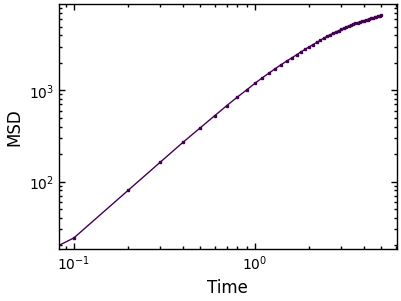

In [5]:
# create a figure object
fig, axs = amep.plot.new()

# plot the MSD in a log-log plot
axs.plot(
    msd.times, # get time values of the analyzed frames
    msd.frames # get MSD at the analyzed frames
)

# axis labels for proper figure
axs.set_xlabel("Time")
axs.set_ylabel("MSD")
axs.loglog() # for typical display of MSD

# save figure as png
fig.savefig("./particles-msd-example.png")

## OACF: orientational autocorrelation function
Next, let's calculate the orientational autocorrelation function (OACF)

In [6]:
# calculate the orientational autocorrelation function
oacf = amep.evaluate.OACF(traj, nav=None)

  0%|          | 0/51 [00:00<?, ?it/s]

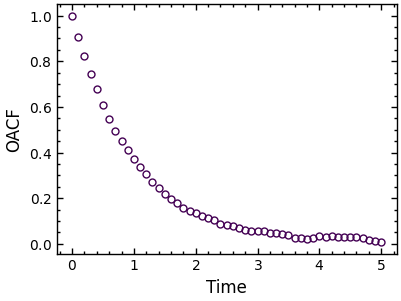

In [7]:
# create a figure object
fig, axs = amep.plot.new()

# plot the OACF in a log-log plot
axs.plot(
    oacf.times,
    oacf.frames,
    'o', # adjust plot style
    ms=5,
    fillstyle="none"
)
axs.set_xlabel("Time")
axs.set_ylabel("OACF")

# save figure as png
fig.savefig("./particles-oacf-example.png")

And, additionally, let's fit it:

In [8]:
import numpy as np
# fit the OACF results
def f(t, tau=1.0):
    return np.exp(-t/tau)

fit = amep.functions.Fit(f)
fit.fit(oacf.times, oacf.frames)

print(f"Fit result: tau = {fit.params[0]:0.4f} +/- {fit.errors[0]:0.4f}")

Fit result: tau = 1.0073 +/- 0.0055


Now, let's plot the data together with the fit:

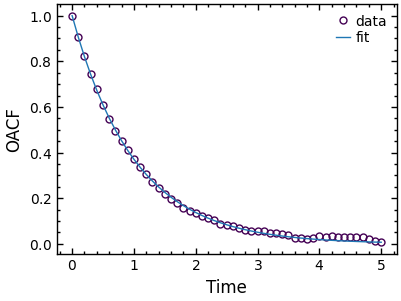

In [9]:
# create a figure object
fig, axs = amep.plot.new()

# plot the OACF in a log-log plot
axs.plot(
    oacf.times,
    oacf.frames,
    label="data",
    marker='o',
    ms=5,
    fillstyle="none",
    ls=""
)

# plot fit
# fit can be generated via the `.generate()` function
axs.plot(
    oacf.times,
    fit.generate(oacf.times),
    label="fit",
    marker='',
    color='tab:blue',
    linestyle='-'
)

axs.set_xlabel("Time")
axs.set_ylabel("OACF")
axs.legend()

# save figure as png
fig.savefig("./particles-oacf-fit-example.png")

Yes, our example simulation have $D_r=1$ in reduced units. The figure shows this good agreement.


## RDF: radial distribution function

Something a bit more interesting now, the radial distribution function. Still not the most difficult to calculate but one step at a time:

In [10]:
# calculate the radial distribution function averaged over 10 frames
# here we skip the first 80 % of the trajectory
# and do the calculation in parallel with 4 jobs to save some time
rdf = amep.evaluate.RDF(
    traj, nav = 10, skip = 0.8, 
    rmax = 10, # maximum distance
    njobs = 4
)

  0%|          | 0/10 [00:00<?, ?it/s]

/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWar

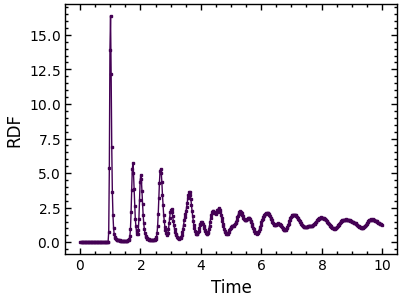

In [11]:
# create a figure object
fig, axs = amep.plot.new()

# plot the RDF
axs.plot(
    rdf.r, # we want the radial distance `r` instead of the time here
    rdf.avg, # and we access the averaged (`.avg`) result
)
axs.set_xlabel("Time")
axs.set_ylabel("RDF")

# save figure as png
fig.savefig("./particles-rdf-example.png")

## PCFangle - angular pair correlation function

The radial distribution function already looks like the system is in a close packing configuration.
Let's check that with another observable, the angular pair correlation function $g(r,\theta)$.

In [12]:
pcfangle = amep.evaluate.PCFangle(
    traj, nav = 5, skip = 0.9, 
    rmax = 5, # maximum distance
    njobs = 4
)

  0%|          | 0/5 [00:00<?, ?it/s]

/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWarning: This process (pid=2181594) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/dormann/anaconda3/envs/amepenv/lib/python3.13/multiprocessing/popen_fork.py:67: DeprecationWar

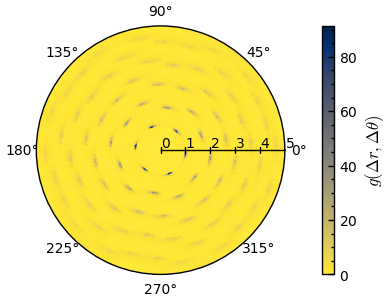

In [13]:
fig, axs = amep.plot.new(subplot_kw=dict(projection="polar"))
mp = axs.pcolormesh(pcfangle.theta, pcfangle.r, pcfangle.avg, cmap="cividis_r")
cax = amep.plot.add_colorbar(fig, axs, mp, label=r"$g(\Delta r, \Delta \theta)$")

# making a simple radial axis
axs.set_rlabel_position(0)
axs.plot([0]*6,range(6), "|-k", ms=5)
axs.set_rticks(range(6))
axs.grid(False)

fig.savefig("./particles-pcfangle-example.png")

## Saving and loading results

Let us now save the results:

In [14]:
# save all analysis results in separate HDF5 files
msd.save('./msd.h5')
oacf.save('./oacf.h5')
rdf.save('./rdf.h5')

Alternatively, you can save all results in one HDF5 file using AMEP's evaluation database feature:

In [15]:
# save all analysis results in one database file
msd.save('./results-db.h5', database = True)
oacf.save('./results-db.h5', database = True)
rdf.save('./results-db.h5', database = True)

The results can later be loaded using the `amep.load.evaluation` function for further processing.

In [16]:
msdloaded = amep.load.evaluation('./msd.h5')

In [17]:
# just so you can see that the loaded results are the same:
msdloaded.frames == msd.frames

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [18]:
# load all analysis data from the database file
results = amep.load.evaluation(
    './results-db.h5',
    database = True
)

In [19]:
# check which data is available within the loaded file
results.keys()

['msd', 'oacf', 'rdf']

## Animation feature

*Please be aware that you need FFmpeg to be installed for the full capabilities of this feature!* Without it, creating animations may take a long time.

Let's create a ``.gif`` so you know how to share your research on social media ;)

In [32]:
# visualize the trajectories of the particles
traj.animate('./particles-animation.gif', xlabel=r'$x$', ylabel=r'$y$')

  0%|          | 0/51 [00:00<?, ?it/s]

<img src="./particles-animation.gif" width="500"/>

# Example 2: Continuum data (Keller-Segel model)

Let's have a look at continuum data.
In the example data, we have a short simulation of the Keller-Segel model in a parameter regime where the concentrations collapse.

Again, we first load the simulation data:

In [22]:
# load simulation data (returns a FieldTrajectory object)
ctraj = amep.load.traj(
    './data/continuum',
    mode = 'field',
    dumps = 'field_*.txt',
    timestep = 0.01,
    # savedir = './data', # directory where to save the .h5amep file can be changed
    # trajfile = 'continuum.h5amep', # name of the saved trajectory file can be changed
    # reload=True # reload the simulation data even if a .h5amep trajectory file exists
)

Next, let us check which data is included within a frame of the trajectory file:

In [23]:
ctraj[0].keys

['c', 'p']

Here, `'c'` denotes the chemical field and `'p'` the bacterial density. In the following, we will analyze the former.

## SF2d - 2D structure factor

Let's have a look at the 2d structure factor of the chemical field.

In [24]:
fsf2d = amep.evaluate.SF2d(
    ctraj, skip = 0.1, 
    ftype = "c"
)

  0%|          | 0/9 [00:00<?, ?it/s]

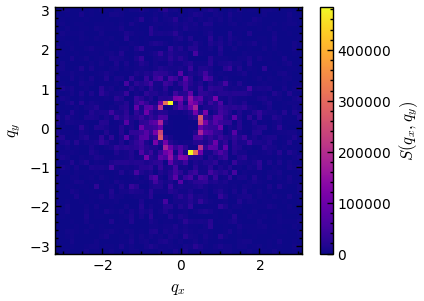

In [25]:
fig, axs = amep.plot.new((5,3))
mp = amep.plot.field(
    axs, fsf2d.avg, fsf2d.qx, fsf2d.qy,
    # cscale="log", vmin=1e4 # if you want to plot in log scale
)
# mp.cmap.set_bad('k') # for log scale because S(q=0) is set to 0

# add colorbar and make plot nice
cax = amep.plot.add_colorbar(
    fig, axs, mp, label=r"$S(q_x, q_y)$"
)
axs.set_aspect("equal")
axs.set_xlabel(r'$q_x$')
axs.set_ylabel(r'$q_y$')

fig.savefig("continuum-sf2d-example.png")

## LDD - local density distribution

Next, we calculate and plot the local density distribution. Note that the following line is calculating the local density distribution for each frame within the trajectory. It is then averaging over all the results, i.e., it is performing a time average (`ldd.avg`). If the simulation is not in a steady state, one has be careful. Here, clearly not all frames are in the steady state. However, the results for each individual frame are still accessible (`ldd.frames`). We will use them here to plot the local density distribution for three different frames.

In [26]:
# calculate the local density distribution
ldd = amep.evaluate.LDdist(
    ctraj, nav = ctraj.nframes, ftype = 'c'
)
# ctraj.nframes returns the number of frames in the trajectory. None can also be used for `nav`. 

  0%|          | 0/11 [00:00<?, ?it/s]

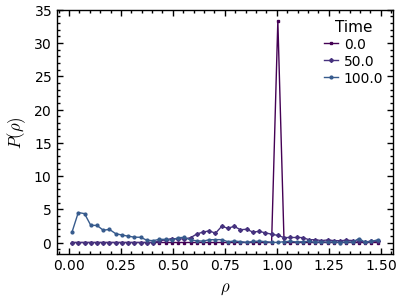

In [27]:
# create a new figure object
fig, axs = amep.plot.new()

# plot the results for three different frames
# first frame
axs.plot(
    ldd.ld, ldd.frames[0,0],
    label = ldd.times[0]
)

# a middle frame
axs.plot(
    ldd.ld, ldd.frames[5,0],
    label = ldd.times[5]
)

# last frame
axs.plot(
    ldd.ld, ldd.frames[-1,0],
    label = ldd.times[-1]
)

# add legends and labels
axs.legend(title = 'Time')
axs.set_xlabel(r'$\rho$')
axs.set_ylabel(r'$P(\rho)$') # we denote the histogram result as P(\rho) here for simplicity of the plot

# save the plot as a pdf file
fig.savefig('./continuum-ldd-example.png')

And again, we can save the analysis results in an HDF5 file for subsequent loading without having to recompute the result.
This is more interesting for computations that take a longer time which we have not chosen for this examples notebook for obvious reasons.

In [28]:
fsf2d.save("./fsf2d.h5")
ldd.save('./ldd.h5')

## Animation

We can create an animation of the trajectory just as we did with the particle-based data.

In [31]:
# visualize the time evolution of the bacterial density p
ctraj.animate('./field-animation.gif', ftype='c', xlabel=r'$x$', ylabel=r'$y$', cbar_label=r'$c(x,y)$')

  0%|          | 0/11 [00:00<?, ?it/s]

<img src="./field-animation.gif" width="500"/>

# Links and further reading material

Please check out our **Hompage**

https://amepproject.de

Our full **AMEP Documentation** 

https://amepproject.de/stable/api.html

Our **GitHub** where you are welcome to leave us a message, request a feature or contribute to the AMEP development.

https://github.com/amepproject/amep

And lastly, we would be happy if you decide to use AMEP in your research. If you do so, please cite our **Publication** [1] where you can find plenty more examples:

**[1] Hecht L., Dormann, K.-R., Spanheimer, K. L., Ebrahimi, M., Cordts, M., Mandal, S., Mukhopadhyay, A. K. & Liebchen, B. (2025). “AMEP: The Active Matter Evaluation Package for Python”, Comput. Phys. Commun., 309, 109483. https://doi.org/10.1016/j.cpc.2024.109483**